# Project: Insurance Policy Cancellation (DS)
---------------------------------------------

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

*This dataset comes from the 2022 NESS Statathon (Theme 1) from 2022. An archived version of the website and related data has been posted on HuskyCT.*

**Challenge:** Using historical policy data, create a multiclass predictive model to predict the policies that are most likely to be canceled and those most likely to be renewed, as well as understand what variables are most influential in causing a policy cancellation.

For this theme, there are true answers, and a team should focus on proposing the best predictive model. The performance of a team will be mainly based on the predictive performance of the propose method measured by accuracy and the quality of the code. You can use Python's weighted F1 score to calculate the performance of for your model on the test partition.
  * Make sure you use the 'weighted' F1 score
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
The Kangaroo data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There were almost 230,000 policies canceled during the effective term. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

Variable descriptions
* id - Policy id (cannot be used in model)
* tenure - Number of years with Kangaroo
* claim.ind - Occurrence of claim (0=no, 1=yes)
* n.adults - Number of adults in the property
* n.children - Number of children in the property
* ni.gender - Gender of policyholder
* ni.marital.status - Marital status of policyholder (0=no, 1=yes)
* premium - Price of the policy
* sales.channel - Medium through which policy was purchased
* coverage.type - Type of coverage
* dwelling.type - Type of dwelling
* len.at.res - Length at residence (how long policyholder lived at property)
* credit - Financial credit level of policyholder
* house.color - Color of house
* ni.age - Age of policholder
* year - Year of the policy
* zip.code - Zip code of the property
* cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel). **This is the response variable.** Dave is deleting the rows where `cancel==-1`!

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
# https://drive.google.com/file/d/1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr/view?usp=share_link
# https://drive.google.com/file/d/1k8asF0dptYNn1DFkylSEpr0D9FstpIO4/view?usp=share_link
# https://drive.google.com/file/d/1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n/view?usp=share_link
# https://drive.google.com/file/d/1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG/view?usp=share_link

!gdown 1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
!gdown 1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
!gdown 1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n
!gdown 1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG

Downloading...
From: https://drive.google.com/uc?id=1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
To: /content/X_test.csv
100% 31.5M/31.5M [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
To: /content/X_train.csv
100% 63.9M/63.9M [00:00<00:00, 203MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nldFnY3-FBKDvfpyLXjD9uxm7d7SLo6n
To: /content/y_test.csv
100% 690k/690k [00:00<00:00, 157MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG
To: /content/y_train.csv
100% 1.40M/1.40M [00:00<00:00, 122MB/s]


# Rubric
The submitted notebook will serve as both a form of model documentation and business communication - there should be lots of text cells and comments and a nice presentation of your work!


## Modeling (20 points)
* You may perform your modeling in a different notebook (to be submitted as an appendix), but you must run your final and BEST model here and all output must be displayed.
  * It's up to you to decide what the best pre-processing steps should be!

## Model Results (20 points)
* Classification report and confusion report for train and test partition.
  * You may use cross-validation to help pick the optimal hyperparameters for your model.

## Interpretability and Discussion (30 points)
* Create permutation importance for top five variables
* Create partial dependence plots for top five variables
  * Don't forget about the `num_grid_points` argument to your PDP if it takes a long time to make the plot.
* You may add other tables/plots/analyses to help tell your story!
*  Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.
  * We are looking for each team to provide a business recommendation based on the results of your model! We will take off substantial points if there is not a well-written and cohesive presentation of results.

## Conclusions (10 points)
* Write five meaningful bullets (each bullet should be at least two sentences long) describing what you learned.

## 🛷 Sliding grading scale
* You are in direct competition with every other group in the class!
* I expect everything in this notebook to be of sufficient quality - well-organized with lots of comments and cleaned up nice for presentation to management. I will deduct substantial points if this is just my code copy/pasted without any deep analysis.
* Your 'starting grades' will range from an 80 to a 100 based on model F1 score for the TEST PARTITION (you can use the `F1 score` function from sci-kit learn to evaluate the final model.)
* Of course, if something is missing from the above rubric, we will deduct points from your starting grade.
  * If you came in first place and lost 10 points somewhere, your final grade is 100 - 10 = 90
  * If you came in last place (for accuracy) and lost 10 points somewhere, your final grade is 80 - 10 = 70.


In [ ]:
# these are the results dave got from a very simple model - you should be able to
# beat these results with some fine-tuning!

### Introduction to the team (Group 5)
* Manas Joshi
* Anuja Sunil Kamble
* Shashank Reddy

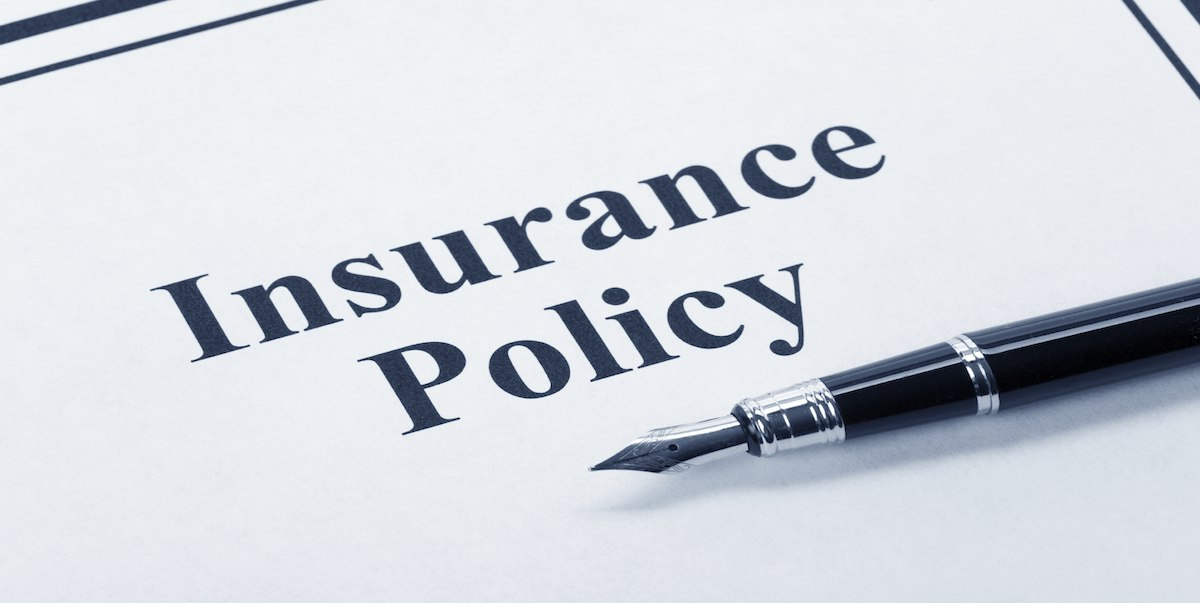

Please use nice big, descriptive subheaders so that it is easy to grade! Thank you!

## Importing the necessary Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.widgets import color_palette
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report



# 1.EDA, data cleaning and feature engineering (20 points)
* `X_train`, `X_test`, `y_train`, and `y_test` has been provided to all students.
  * Any team who does not do this automatically goes into last place - more below!
* Explore the data and clean it up as you see fit - make sure you `fit_transform()` on the training data and `transform()` on the test data.
  * Any team that has data leakage automatically goes into last place!
* Make five meaningful plots and five meaningful tables (most be deeper than simpler univariate plots - we want you to really explore the problem at hand and use this information to make a better model!)
* It is up to you whether or not you want to curate the training dataset to get a better fit on the test dataset (for example, if you would like to use some sampling strategy like SMOTE, that's great - just remember that you DON'T change the distribution of the target variable in the test partition.)

##1.1 Data Load and EDA

In [ ]:
# Read the files using pandas's read_csv method

df_X_train = pd.read_csv("X_train.csv")
df_X_test = pd.read_csv("X_test.csv")
df_y_train = pd.read_csv("y_train.csv")
df_y_test = pd.read_csv("y_test.csv")


In [ ]:
# Calculating number of classes in y variable for training data
df_y_train['cancel'].value_counts()

0    496542
2    153180
1     50510
Name: cancel, dtype: int64

In [ ]:
# Calculating number of classes in y variable for testing data
df_y_test['cancel'].value_counts()

0    244522
2     75597
1     24772
Name: cancel, dtype: int64

In [ ]:
#chechking the info of the data
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700232 entries, 0 to 700231
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 700232 non-null  int64  
 1   year               700232 non-null  int64  
 2   zip.code           699601 non-null  float64
 3   house.color        699612 non-null  object 
 4   ni.age             699524 non-null  float64
 5   len.at.res         699567 non-null  float64
 6   credit             699616 non-null  object 
 7   coverage.type      699569 non-null  object 
 8   dwelling.type      699581 non-null  object 
 9   premium            699608 non-null  float64
 10  sales.channel      699536 non-null  object 
 11  ni.gender          699589 non-null  object 
 12  ni.marital.status  699585 non-null  float64
 13  n.adults           699626 non-null  float64
 14  n.children         699616 non-null  float64
 15  tenure             699577 non-null  float64
 16  cl

In [ ]:
# Checking number of missing values in training data
df_X_train.isnull().sum()


id                     0
year                   0
zip.code             631
house.color          620
ni.age               708
len.at.res           665
credit               616
coverage.type        663
dwelling.type        651
premium              624
sales.channel        696
ni.gender            643
ni.marital.status    647
n.adults             606
n.children           616
tenure               655
claim.ind            658
dtype: int64

In [ ]:
# Checking number of missing values in test data
df_X_test.isnull().sum()

id                     0
year                   0
zip.code             313
house.color          319
ni.age               293
len.at.res           295
credit               289
coverage.type        316
dwelling.type        339
premium              331
sales.channel        324
ni.gender            314
ni.marital.status    345
n.adults             323
n.children           319
tenure               323
claim.ind            324
dtype: int64

###Removal of Null values

In [ ]:
# We created a series which is boolean, it is true when there is any null values in the training or testing set
null_rows_train = df_X_train.isnull().any(axis=1)
null_rows_test = df_X_test.isnull().any(axis=1)
# code removes null values from the traing data(independent)
X_train_preprocessed = df_X_train[~null_rows_train]
X_test_preprocessed  = df_X_test[~null_rows_test]
y_train_preprocessed = df_y_train[~null_rows_train]
y_test_preprocessed = df_y_test[~null_rows_test]

In [ ]:
X_train_preprocessed.head(5)


,id,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,942391,2013,15056.0,yellow,55.0,15.0,high,A,House,935.554116,Phone,F,1.0,1.0,1.0,14.0,0.0
1,2792,2014,80014.0,red,60.0,17.0,medium,A,House,835.804218,Phone,F,1.0,1.0,1.0,17.0,0.0
2,282556,2014,85002.0,white,48.0,15.0,high,A,Condo,958.488416,Broker,M,1.0,1.0,0.0,11.0,1.0
3,738330,2014,85051.0,red,57.0,15.0,high,A,House,963.496010,Phone,F,1.0,2.0,1.0,19.0,0.0
4,243724,2013,85077.0,white,42.0,16.0,high,B,House,803.088375,Broker,F,1.0,2.0,2.0,12.0,0.0


In [ ]:
X_test_preprocessed.head(5)

,id,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,812304,2013,50020.0,white,33.0,16.0,high,C,House,796.385532,Broker,F,1.0,1.0,3.0,2.0,1.0
1,304035,2013,80002.0,red,56.0,10.0,high,A,House,773.232687,Broker,M,1.0,2.0,0.0,14.0,0.0
2,88142,2015,85005.0,white,46.0,12.0,high,C,Condo,943.047142,Broker,F,1.0,2.0,2.0,9.0,0.0
3,224693,2015,98026.0,blue,45.0,15.0,high,A,Tenant,949.368847,Broker,M,1.0,1.0,3.0,12.0,0.0
4,199182,2014,50022.0,white,28.0,19.0,low,C,Tenant,875.873613,Broker,F,1.0,1.0,1.0,7.0,1.0


In [ ]:
#Checking for the datapoints after removal of null values for training data set
X_train_preprocessed.isnull().sum()


id                   0
year                 0
zip.code             0
house.color          0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
dtype: int64

In [ ]:
#Checking for the datapoints after removal of null values for testing data set
X_test_preprocessed.isnull().sum()


id                   0
year                 0
zip.code             0
house.color          0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
dtype: int64

In [ ]:
#Appending the y-cancel in train data
X_train_preprocessed['cancel'] = y_train_preprocessed['cancel']

<ipython-input-17-91aa03d50e13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_preprocessed['cancel'] = y_train_preprocessed['cancel']


In [ ]:
#Appending the y-cancel in test data
X_test_preprocessed['cancel'] = y_test_preprocessed['cancel']

<ipython-input-18-4a2abe617c65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_preprocessed['cancel'] = y_test_preprocessed['cancel']


In [ ]:
X_train_preprocessed.dtypes

id                     int64
year                   int64
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status    float64
n.adults             float64
n.children           float64
tenure               float64
claim.ind            float64
cancel                 int64
dtype: object

### Change DataType

In [ ]:
# I specifically changed the data types of graphs because I want some specific categorical graphs
X_train_preprocessed['cancel'] = X_train_preprocessed['cancel'].astype('category')
X_train_preprocessed['claim.ind'] = X_train_preprocessed['claim.ind'].astype('int')
X_train_preprocessed['tenure'] = X_train_preprocessed['tenure'].astype('int')
X_train_preprocessed['sales.channel'] = X_train_preprocessed['sales.channel'].astype('category')
X_train_preprocessed['dwelling.type'] = X_train_preprocessed['dwelling.type'].astype('category')
X_train_preprocessed['coverage.type'] = X_train_preprocessed['coverage.type'].astype('category')
X_train_preprocessed['credit'] = X_train_preprocessed['credit'].astype('category')
X_train_preprocessed['year'] = X_train_preprocessed['year'].astype('category')
X_train_preprocessed['zip.code'] = X_train_preprocessed['zip.code'].astype('int').astype('str')
X_train_preprocessed['ni.marital.status'] = X_train_preprocessed['ni.marital.status'].astype('int').astype('category')
X_train_preprocessed['n.adults'] = X_train_preprocessed['n.adults'].astype('int')
X_train_preprocessed['n.children'] =X_train_preprocessed['n.children'].astype('int')
X_train_preprocessed['ni.gender'] = X_train_preprocessed['ni.gender'].astype('category')

<ipython-input-20-793aeddaba3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_preprocessed['cancel'] = X_train_preprocessed['cancel'].astype('category')
<ipython-input-20-793aeddaba3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_preprocessed['claim.ind'] = X_train_preprocessed['claim.ind'].astype('int')
<ipython-input-20-793aeddaba3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


## Data Visualization

<ipython-input-21-e7a1ab6389e7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


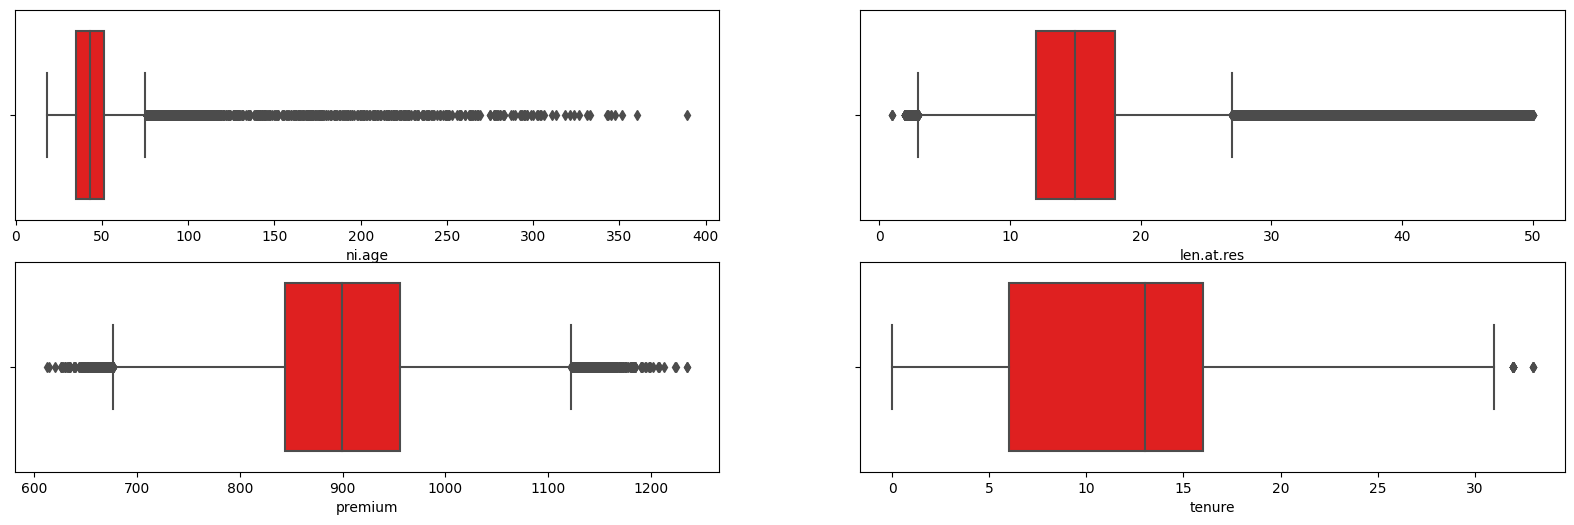

In [ ]:
# Box plots for continues features in the data(training)
plt.figure(figsize=(20, 6))
plt.title('Box plots for continues features in the data(training)')
plt.subplot(2, 2, 1)
sns.boxplot(data=X_train_preprocessed, x='ni.age', color='red')
plt.subplot(2, 2, 2)
sns.boxplot(data=X_train_preprocessed, x='len.at.res', color='red')
plt.subplot(2, 2, 3)
sns.boxplot(data=X_train_preprocessed, x='premium', color='red')
plt.subplot(2, 2, 4)
sns.boxplot(data=X_train_preprocessed, x='tenure', color='red')
plt.show()


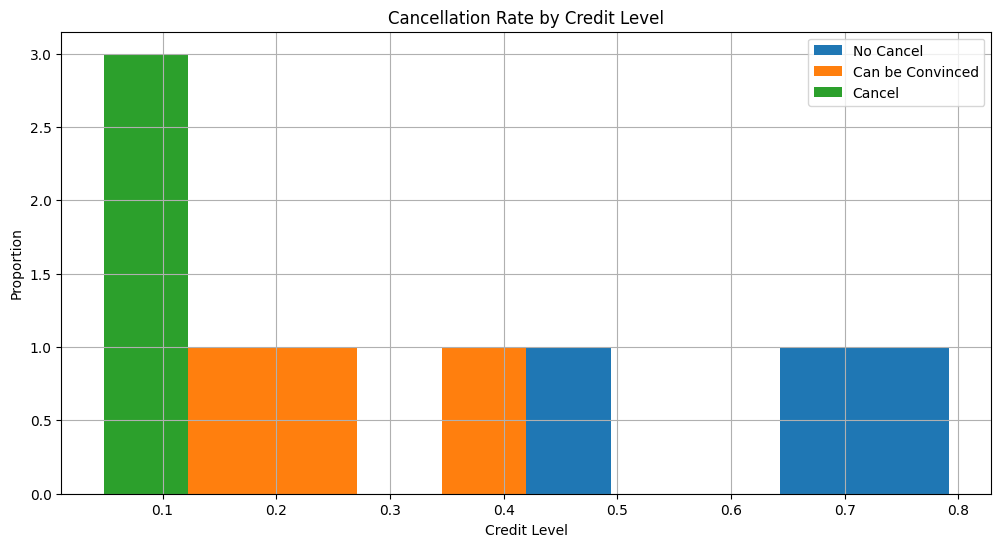

In [ ]:


credit_categories = X_train_preprocessed.groupby('credit')['cancel'].value_counts(normalize=True).unstack()

# Reset the index and rename columns for better readability
credit_categories.reset_index(inplace=True)
credit_categories.columns = ['Credit', 'No Cancel', 'Can be Convinced', 'Cancel']

# Creating a histogram plot from the different categories in Credit coloumn
ax = credit_categories.plot(x='Credit', y=['No Cancel', 'Can be Convinced', 'Cancel'], kind='hist', figsize=(12, 6), grid =True )
plt.title('Cancellation Rate by Credit Level')
plt.xlabel('Credit Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()



##According to the plot displaying cancellation rates for the training data, customers with high credit levels have a greater percentage of policies that were not canceled, whereas those with low credit levels have a higher percentage of policies that were canceled. The customers with moderate credit levels fall somewhere in the middle. This implies that credit level plays a significant role in forecasting policy cancellation

  Sales Channel  No Cancel  Can be Convinced    Cancel
0        Broker   0.784266          0.165381  0.050353
1        Online   0.622737          0.281911  0.095353
2         Phone   0.600104          0.295836  0.104060


<Figure size 1000x600 with 0 Axes>

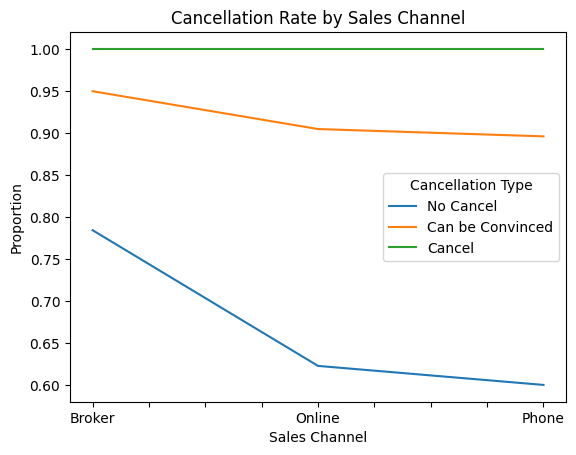

In [ ]:
# Grouping sales categories together to plot a line plot
sales_channel_categories = X_train_preprocessed.groupby('sales.channel')['cancel'].value_counts(normalize=True).unstack()


sales_channel_categories.reset_index(inplace=True)
sales_channel_categories.columns = ['Sales Channel', 'No Cancel', 'Can be Convinced', 'Cancel']
print(sales_channel_categories)

# After grouping the sales channel craetin a line plot
plt.figure(figsize=(10, 6))
sales_channel_categories.set_index('Sales Channel').plot(kind='line', stacked=True)
plt.title('Cancellation Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Proportion')
plt.legend(title='Cancellation Type')
plt.xticks(rotation=0)
plt.show()

##The plot illustrates the cancellation rate categorized by sales channel, with the table and line plot presenting the proportion of policies that were either not canceled, persuaded to stay, or canceled for each channel. Based on the insights from this plot, we can infer that the online sales channel has the most significant proportion of policies that remain active, whereas the phone sales channel has the highest percentage of canceled policies.






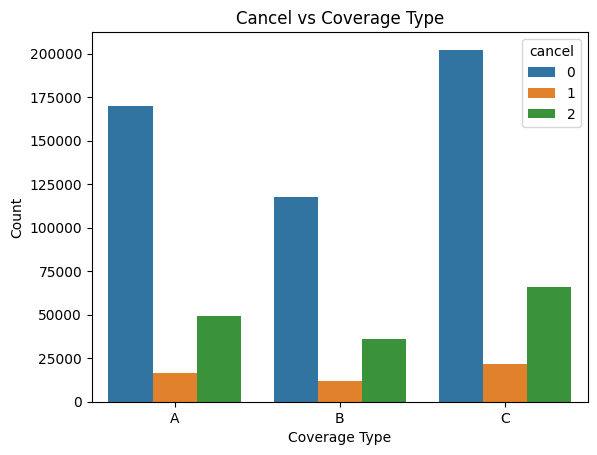

In [ ]:
# Plotting a graph between cancel variable and coverage type variable
sns.countplot(data=X_train_preprocessed, x='coverage.type', hue='cancel')
plt.title('Cancel vs Coverage Type')
plt.xlabel('Coverage Type')
plt.ylabel('Count')
plt.show()



##Based on the plot, it appears that a large proportion of canceled policies belonged to the "A" coverage type, followed by the "C" coverage type. On the other hand, the "A" and "B" coverage types had a higher proportion of policies that were not canceled. This indicates that coverage type could be a crucial factor in forecasting policy cancellations.

<ipython-input-25-3ef260b149ab>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train_preprocessed.corr()


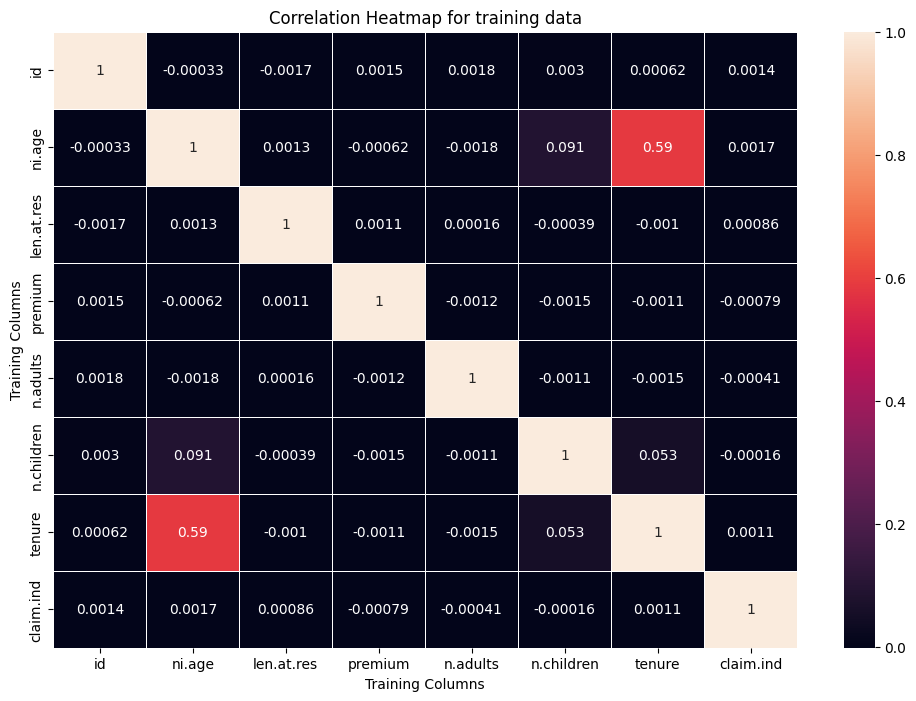

In [ ]:
# Corrlation plot between all of the columns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
correlation_matrix = X_train_preprocessed.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title("Correlation Heatmap for training data")
plt.xlabel("Training Columns")
plt.ylabel('Training Columns')
plt.show()

In [ ]:
# Creating a contingency table for cancel vs. credit columns
t1 = pd.crosstab(X_train_preprocessed['credit'],X_train_preprocessed['cancel'])
t1
#The graph and table indicate that coverage type C has the greatest count of policies that are likely to be canceled or have already been canceled, while coverage type B has the smallest number of policies falling under these categories. This observation suggests that coverage type could be a significant factor in forecasting policy cancellations.

cancel,0,1,2
credit,,,
high,337963,20526,68309
low,54409,13023,45632
medium,97326,16244,37177


In [ ]:
# Create a contingency table of cancel vs. dwelling type columns
grouped_dwelling_categories = X_train_preprocessed.groupby('dwelling.type')['cancel'].value_counts().unstack()

# Reset the index and rename columns for better readability
grouped_dwelling_categories.reset_index(inplace=True)
grouped_dwelling_categories.columns = ['Dwelling Type', 'No Cancel', 'Can be Convinced', 'Cancel']

# Create the table
print(grouped_dwelling_categories)
# The table shows House type of Dwelling Type has the highest chance of not cancelling the policy

  Dwelling Type  No Cancel  Can be Convinced  Cancel
0         Condo     115196             37943   12658
1         House     281011             80532   26133
2        Tenant      93491             32643   11002


In [ ]:
# Create a contingency table of cancel vs. sales channel columns
grouped_sales_channel = X_train_preprocessed.groupby('sales.channel')['cancel'].value_counts().unstack()

# Reset the index and rename columns for better readability
grouped_sales_channel.reset_index(inplace=True)
grouped_sales_channel.columns = ['Sales Channel', 'No Cancel', 'Can be Convinced', 'Cancel']

# Create the table
print(grouped_sales_channel)

  Sales Channel  No Cancel  Can be Convinced  Cancel
0        Broker     314856             66395   20215
1        Online      36488             16518    5587
2         Phone     138354             68205   23991


In [ ]:
# Create a contingency table of cancel vs. claim indicator
t2 = pd.crosstab(X_train_preprocessed['claim.ind'],X_train_preprocessed['cancel'])
t2

cancel,0,1,2
claim.ind,,,
0,401086,37305,114628
1,88612,12488,36490


# Feature Engineering

In [ ]:
# For trainig data changing the name of the columns
X_train_preprocessed['zone'] = X_train_preprocessed['zip.code'].astype(str).str[0:2]
X_train_preprocessed['zone'] = X_train_preprocessed['zone'].astype('category')

<ipython-input-30-4296ca00203b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_preprocessed['zone'] = X_train_preprocessed['zip.code'].astype(str).str[0:2]
<ipython-input-30-4296ca00203b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_preprocessed['zone'] = X_train_preprocessed['zone'].astype('category')


In [ ]:
#test data
X_test_preprocessed['zone'] = X_test_preprocessed['zip.code'].astype(str).str[0:2]
X_test_preprocessed['zone'] = X_test_preprocessed['zone'].astype('category')

<ipython-input-31-be657ef6bbfc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_preprocessed['zone'] = X_test_preprocessed['zip.code'].astype(str).str[0:2]
<ipython-input-31-be657ef6bbfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_preprocessed['zone'] = X_test_preprocessed['zone'].astype('category')


In [ ]:
#One hot encoding on the traing and testing data, converting categorical variables to numericals
X_train_onehot = pd.get_dummies(X_train_preprocessed, columns=['house.color', 'coverage.type', 'dwelling.type', 'sales.channel', 'ni.gender','credit'])
X_test_onehot = pd.get_dummies(X_test_preprocessed, columns=['house.color', 'coverage.type', 'dwelling.type', 'sales.channel', 'ni.gender','credit'])

# Make sure both training and test datasets have the same columns after one-hot encoding
X_train_onehot, X_test_onehot = X_train_preprocessed.align(X_test_preprocessed, join='left', axis=1)
X_test_onehot = X_test_onehot.fillna(0)

In [ ]:
X_train_onehot.columns

Index(['id', 'year', 'zip.code', 'house.color', 'ni.age', 'len.at.res',
       'credit', 'coverage.type', 'dwelling.type', 'premium', 'sales.channel',
       'ni.gender', 'ni.marital.status', 'n.adults', 'n.children', 'tenure',
       'claim.ind', 'cancel', 'zone'],
      dtype='object')

In [ ]:
#Drop the columns of categorical features in train data
drop_columns =['id',  'zip.code','house.color','coverage.type', 'dwelling.type', 'sales.channel', 'ni.gender','ni.gender_F','credit']
all_columns = set(X_train_onehot.columns)
list_X = list(all_columns.difference(set(drop_columns)))
X_train_preprocessed = X_train_onehot[list_X]

In [ ]:
#Drop the columns of categorical features in test data
all_columns = set(X_test_onehot.columns)
list_X = list(all_columns.difference(set(drop_columns)))
X_test_preprocessed = X_test_onehot[list_X]

## Sampling

In [ ]:
X_train_preprocessed.columns

Index(['len.at.res', 'zone', 'ni.age', 'ni.marital.status', 'year',
       'claim.ind', 'tenure', 'cancel', 'premium', 'n.children', 'n.adults'],
      dtype='object')

In [ ]:
# assigning cancel variable to y_train
y_train = X_train_preprocessed['cancel']
# drooping cancel column from X_train_preprocessed
X_train_preprocessed = X_train_preprocessed.drop('cancel', axis=1)

In [ ]:
y_test = X_test_preprocessed['cancel']
X_test_preprocessed = X_test_preprocessed.drop(['cancel'], axis=1)

In [ ]:
# Using oversampling technique to oversample the data into different classes
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_preprocessed, y_train)

print(pd.Series(y_resampled).value_counts())

0    489698
1    489698
2    489698
Name: cancel, dtype: int64


In [ ]:
X_resampled.dtypes

len.at.res            float64
zone                 category
ni.age                float64
ni.marital.status    category
year                 category
claim.ind               int64
tenure                  int64
premium               float64
n.children              int64
n.adults                int64
dtype: object

# Models and weighted F-1 Score

In [ ]:
# Scaling the data using min max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test_preprocessed)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit random forest model using scikit learn
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train_scaled, y_resampled)

y_pred = RF.predict(X_test_scaled)

# Evaluate performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.89      0.80    241140
           1       0.14      0.03      0.05     24447
           2       0.36      0.20      0.26     74567

    accuracy                           0.68    340154
   macro avg       0.41      0.37      0.37    340154
weighted avg       0.61      0.68      0.63    340154



In [ ]:
# Calculating weighted F1 score
from sklearn.metrics import f1_score
f1_score_weighted = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 score of our model is: ", f1_score_weighted)


Weighted F1 score of our model is:  0.6301363022470613


In [ ]:
len(X_train_scaled)

1469094

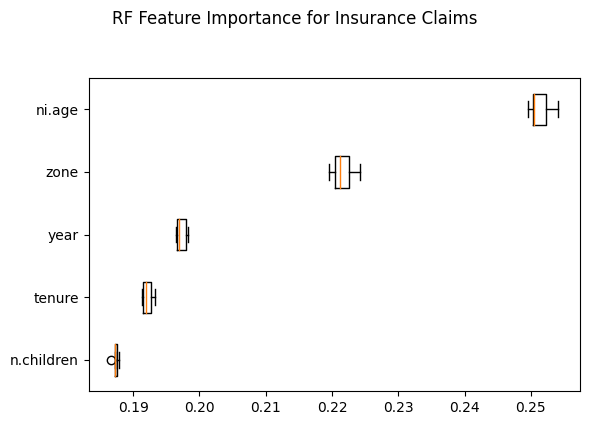

In [ ]:
from sklearn.inspection import permutation_importance


clf = RF

result = permutation_importance(clf, X_train_scaled[0:50000], y_resampled[0:50000], n_repeats=5,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()[-5:]

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train_preprocessed.columns[perm_sorted_idx])
fig.suptitle('RF Feature Importance for Insurance Claims', y=1.05)
fig.tight_layout()
plt.show()

# From the above plot it is quite evident that ni.age , zone, year, tenure, and n.children are top features for prediction
# I also chose only first 50000 data to get the permutation graphs to easily run the algorithm(Further optimization can be made to run the whole data (GPU implementation(CUDA))).

In [ ]:
# Installing Pycebox for plotting partial graphs
!pip install pycebox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Partial Dependency Plots

In [ ]:
# converting numpy array to dataframe
import pandas as pd
train_X_df = pd.DataFrame(X_train_scaled, columns=X_train_preprocessed.columns)

In [ ]:
train_X_df.shape

(1469094, 10)

##1. ni.age

In [ ]:
from pycebox.ice import ice
tmpdf = ice(data=train_X_df[0:50000] ,
            column='ni.age',
                   predict=RF.predict,num_grid_points=20)

print(np.shape(tmpdf))


(20, 50000)


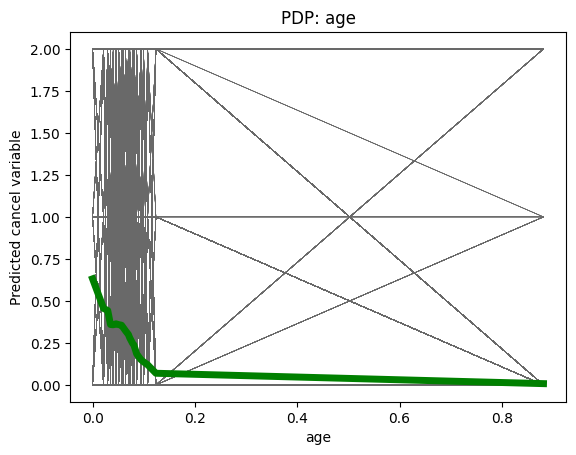

In [ ]:
from pycebox.ice import ice_plot
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'green'})
plt.title('PDP: age')
plt.ylabel('Predicted cancel variable')
plt.xlabel('age');
plt.show()

##2. Zone

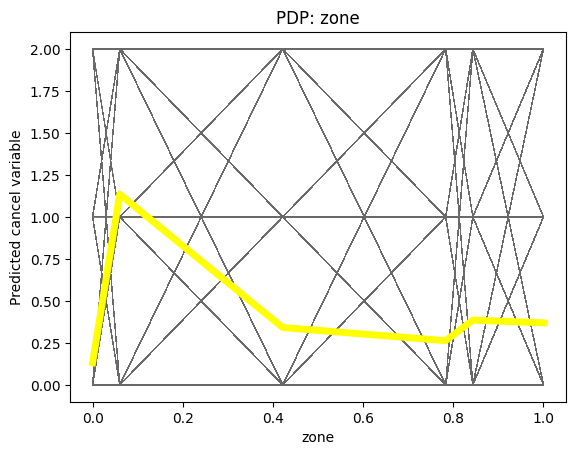

In [ ]:

tmpdf = ice(data=train_X_df[0:50000] ,
            column='zone',
                   predict=RF.predict,num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'yellow'})
plt.title('PDP: zone')
plt.ylabel('Predicted cancel variable')
plt.xlabel('zone');
plt.show()


##3. year


(4, 50000)


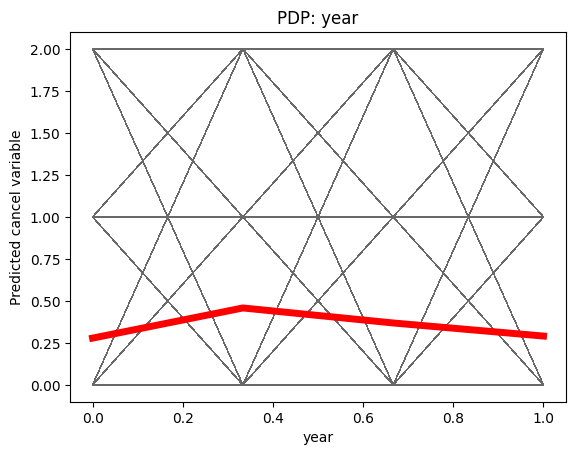

In [ ]:
tmpdf = ice(data=train_X_df[0:50000] ,
            column='year',
                   predict=RF.predict,num_grid_points=20)

print(np.shape(tmpdf))
ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: year')
plt.ylabel('Predicted cancel variable')
plt.xlabel('year');
plt.show()

##4.n.children

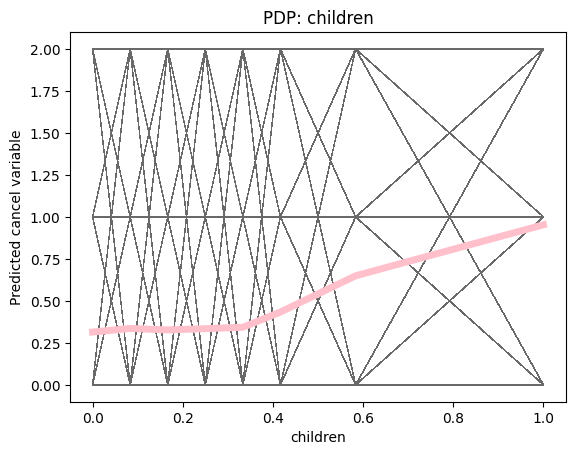

In [ ]:
tmpdf = ice(data=train_X_df[0:50000] ,
            column='n.children',
                   predict=RF.predict,num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'pink'})
plt.title('PDP: children')
plt.ylabel('Predicted cancel variable')
plt.xlabel('children');
plt.show()

## 5.tenure

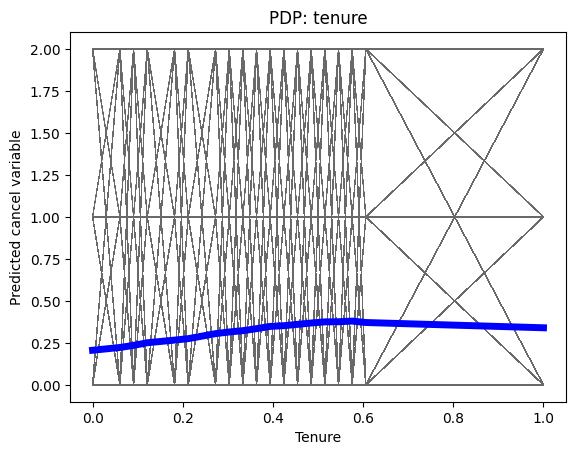

In [ ]:

tmpdf = ice(data=train_X_df[0:50000] ,
            column='tenure',
                   predict=RF.predict,num_grid_points=20)

ice_plot(tmpdf, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'blue'})
plt.title('PDP: tenure')
plt.ylabel('Predicted cancel variable')
plt.xlabel('Tenure');
plt.show()

# Recommendation



According to the results of the analysis, the factors that most strongly predict policy cancellations are the customer's location (determined by the first two digits of their zip code), the number of children in their household, and their age. This indicates that policies are more likely to be terminated in certain geographic regions or for customers in specific stages of life. To minimize churn and retain customers, the insurance company should consider offering targeted promotions or discounts to those in higher-risk areas or life stages. Furthermore, it would be beneficial for the company to investigate the underlying causes of cancellations in these areas or life stages and address any issues to prevent future cancellations.

#Conclusions

1. In data preparation we performed tasks like cleaning the data, handling missing values, scaling features, etc, through this we understood the quality of data and the types of preprocessing techniques that worked best. By doing the analysis of the data we found that the policy cancellation rate is highly dependent on the factors - policyholder's claim history, age, location, and number of children

2. After running different models we found the random forest worked the best with our data. Our model achieved an accuracy of 63.022% predicting if the particular policy will be canceled or not. We think by providing more training data there will be room for improvement in the accuracy of the model as when we are not getting classifiers accurate enough then in the practical world the quicker path to success is to gather more data.

3. After doing permutation importance analysis we discovered which features in our dataset have an impact on predicting the probability of policy cancellation, we found that number of children and policy zone had a very significant impact on policy cancellation followed by other factors like age, claim history, and year.

4. We used partial dependence plots to show dependency between the target response and set of input features of interest, it showed that the probability of policy cancellation increased with an increasing number of children and policy zone as well as the probability of policy cancellation increased for policyholders with claim history and older age.

5. After analyzing all the data, we can see that the major factors affecting the probability of policy cancellation are policyholders' age, location, area, and claim history. We recommend that insurance company pay more attention to these factors while evaluating the policy cancellation risk.

6. Data alone is not enough - having some domain knowledge and understanding of data are important in making the right assumptions. In machine learning we can't simply get something from nothing, what it does is get more from less. Learners combine knowledge with data to grow programs.

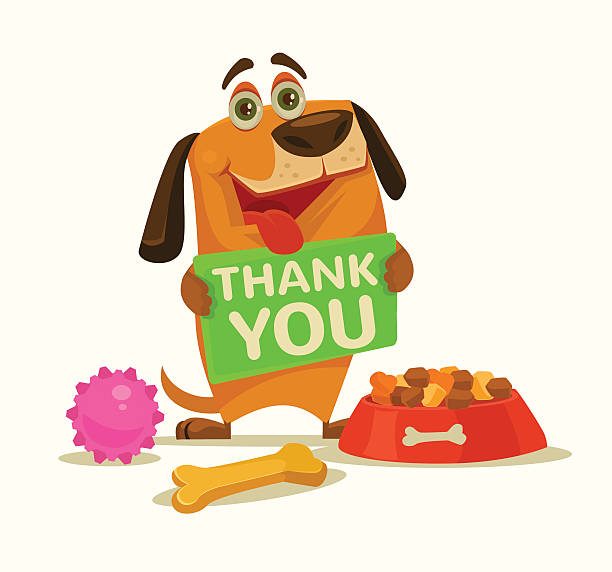